In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
from numpy import ones
from numpy import array
import matplotlib.pyplot as plt
from numpy import mean

In [3]:
Φ = array([	[1,1],
			[2,1],
			[2,1],
			[3,1]])

In [4]:
n = Φ.shape[0]

In [5]:
y = array([	[1],
			[1],
			[2],
			[2]])

In [6]:
w = array([[0],[1]]) 
η = 0.1

The function we are trying to minimize is<br>
$$\min_w \; f(x) = \frac{1}{n} \; \sum_i^n \; (w^{\top} \phi(x_i) - y_i)^2$$

In [7]:
def f(w):
	fₒ = 0						# function output
	for ϕᵢ, yᵢ in zip(Φ,y):
		ϕᵢ = np.reshape(ϕᵢ, (2,1))
		fₒ += (w.T.dot(ϕᵢ) - yᵢ)**2
#	
	return ((1/n)*fₒ).item()
#	

The equation for the gradient is <br>
$$f'(x) = \frac{2}{n} \; \sum_i^n \; (w^{\top} \phi(x_i) - y_i) \phi(x_i)$$

In [8]:
def fᑊ(w):
	ᐁf = np.zeros((2,1))
	for ϕᵢ, yᵢ in zip(Φ,y):
		ϕᵢ = np.reshape(ϕᵢ, (2,1))
		ᐁf += (w.T.dot(ϕᵢ) - yᵢ)*ϕᵢ
	return (2/n)*ᐁf

In [9]:
f_value_list = []
for i in range(400):
	w = w - η*fᑊ(w)				# gradient descent update w
	f_value_list.append(f(w))

In [10]:
print('Best w = \n', w)
print('Predictions: \n', Φ.dot(w))

Best w = 
 [[0.49984354]
 [0.5003448 ]]
Predictions: 
 [[1.00018834]
 [1.50003188]
 [1.50003188]
 [1.99987542]]


Get the points for the best fit line

In [11]:
xp = np.linspace(0,4,10)
fₓ = w[0]*xp + w[1]

Draw the best fit line and the data out

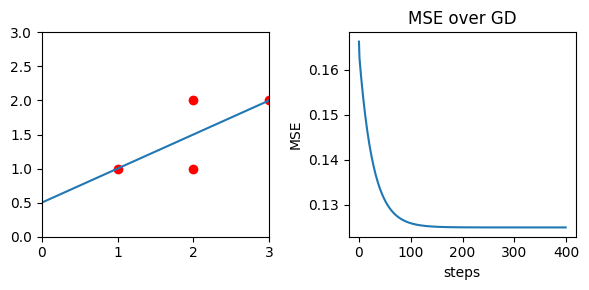

In [12]:
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.scatter(Φ[:,0], y, color='red')
plt.plot(xp, fₓ)
plt.xlim(0,3)	# Show this region along x-axis
plt.ylim(0,3)	# Show this region along y-axis
#
# Display the error over GD
plt.subplot(122)
plt.plot(f_value_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()